In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

* https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstwo.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#id1
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstwobign.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kolmogorov.html

## Kolmogorov-Smirnov Test

Empirical CDF $F_n(x)$ computed using $n$ sample observation $X_1, X_2,\dots, X_n$ is defined as 

$$
F_n(x) = \frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{X_i \leq x}
$$

where $\mathbb{1}_{X_i \leq x}$ is an indicator function that is equal to 1 for $X_i \leq x$ and 0 otherwise.

## One-Sample KS Test

One sample KS test can be used to compare a sample with a reference distribution. Is the sample drawn from the reference disribution? The test statistic $D_n$ is defined as

$$
D_n = \sup_x|F_n(x) - F(x)|
$$

where $F_n(x)$ is the emprical CDF of the sample and $F(x)$ is the reference CDF. $\sup$ is the supremum of the set of distances (intuitively the largest absolute difference).

In [117]:
def empirical_cdf_factory(sample):
    def empirical_cdf(x):
        return (1 / len(sample)) * sum([int(X_i < x) for X_i in sample])
    
    return np.vectorize(empirical_cdf)
  
np.random.seed(0)
sample = np.random.randn(100) + 6
empirical_cdf = empirical_cdf_factory(sample)
cdf = st.norm(loc=6, scale=1).cdf

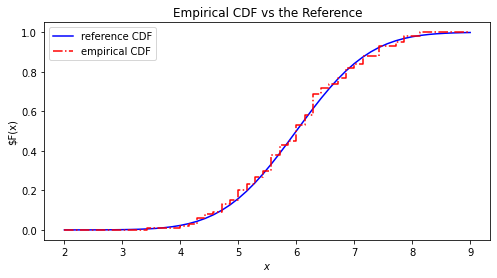

In [70]:
x = np.linspace(2, 9, 50)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, cdf(x), "b", label="reference CDF")
ax.step(x, empirical_cdf(x), "r-.", label="empirical CDF")
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)")
ax.set_title("Empirical CDF vs the Reference")
plt.legend()
plt.show()

In [125]:
def ks_stat(cdf_1, cdf_2, x):
    return np.abs(cdf_1(x) - cdf_2(x)).max()

In [133]:
# under the null hypothesis that the sample comes from the reference distribution,
# sqrt(n) * D_n statisic follows kolmogorov distribution

D_n = ks_stat(cdf, empirical_cdf, sample)
print(D_n)

0.05824863872383251


In [119]:
# KS two-sided test statistic distribution for finite sample size n
1 - st.kstwo.cdf(D_n, len(sample))

0.8667717341286234

In [120]:
1 - st.kstwobign.cdf(np.sqrt(len(sample)) * D_n)

0.8865884365301926

In [121]:
st.kstest(sample, cdf, alternative="two-sided")

KstestResult(statistic=0.05824863872383251, pvalue=0.8667717341286234)

## Two-Sample KS Test

Two-sample KS Test is used to compare two samples using their empirical CDFs. Are both samples drawn from the same
unknown distribution?

The statistic is defined as

$$
D_{n,m} = \sup_x|F_n(x) - F_m(x)|
$$

where $F_n(x)$ and $F_(m)$ are the empirical CDFs of the first and second sample respectively.

In [135]:
sample_1 = np.random.randn(100) + 6
sample_2 = np.random.randn(100) + 6

empirical_cdf_n = empirical_cdf_factory(sample_1)
empirical_cdf_m = empirical_cdf_factory(sample_2)

In [166]:
D_nm = ks_stat(empirical_cdf_n, empirical_cdf_m, sample_1)
print(D_nm)

0.10999999999999999


In [175]:
# https://github.com/scipy/scipy/blob/7f7db53324bc6c9b7e8eac0a42441529da7b8b0c/scipy/stats/_stats_py.py#L7786
n = (len(sample_1) * len(sample_2)) / (len(sample_1) + len(sample_2))
1 - st.kstwo.cdf(D_nm, n)

0.5439007965907301

In [174]:
# st.ks_2samp can also be used
# asymp, because auto/exact mode is using some strange algorithm
st.kstest(sample_1, sample_2, alternative="two-sided", mode="asymp")

KstestResult(statistic=0.10999999999999999, pvalue=0.5439007965907301)

For large samples, the null hypothesis is rejected at level $\alpha$ if

$$
D_{n,m} > \sqrt{-\log\left(\frac{\alpha}{2}\right)\frac{1 + \frac{m}{n}}{2m}}
$$

In [177]:
def ks_two_sample_ppf(alpha, n, m):
    return np.sqrt(-np.log(alpha / 2) * ((1 + m / n) / 2 * m))

In [178]:
D_nm > ks_two_sample_ppf(0.5, 100, 100)

False